In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder, StandardScaler

In [2]:
PATH = './Data/Raw/'

In [3]:
files = os.listdir(PATH)

pbp_df = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv(PATH + file, on_bad_lines = 'skip')
    temp_df['File'] = file[4:8] # to be able to filter data later on by file 
    pbp_df = pbp_df.append(temp_df)

C:\Users\Lucas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (15,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(F'Data of {pbp_df["GameId"].nunique()} individual Games.')

print(F'''
Shape: {pbp_df.shape}
      
Columns:
{pbp_df.columns.tolist()}''')

print(F"""
Missing:
{pbp_df.isnull().mean().mul(100).sort_values(ascending = False).round(2).astype(str) + '%'}    
""")

Data of 2494 individual Games.

Shape: (445983, 46)
      
Columns:
['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam', 'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10', 'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin', 'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation', 'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown', 'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed', 'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble', 'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful', 'RushDirection', 'YardLineFixed', 'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType', 'PenaltyYards', 'File']

Missing:
Unnamed: 10                       100.0%
Unnamed: 12                       100.0%
Challenger                        100.0%
Unnamed: 17                       100.0%
Unnamed: 16                       100.0%
PenaltyTeam                       91.86%
PenaltyType  

In [5]:
# drop unnecessary columns
pbp_df = pbp_df.drop(labels = ['Unnamed: 12', 'Unnamed: 10', 'Unnamed: 16', 'Unnamed: 17', 'Challenger'], axis = 1)

In [6]:
# show how many points of data are available for every team per year
pbp_df.groupby(['OffenseTeam', 'File']).size().mean() 

1287.20625

In [7]:
pbp_df['PlayType'].unique()

array([nan, 'EXCEPTION', 'TIMEOUT', 'KICK OFF', 'QB KNEEL', 'PASS',
       'SACK', 'RUSH', 'CLOCK STOP', 'PUNT', 'EXTRA POINT', 'NO PLAY',
       'FIELD GOAL', 'SCRAMBLE', 'FUMBLES', 'TWO-POINT CONVERSION',
       'PENALTY', '0'], dtype=object)

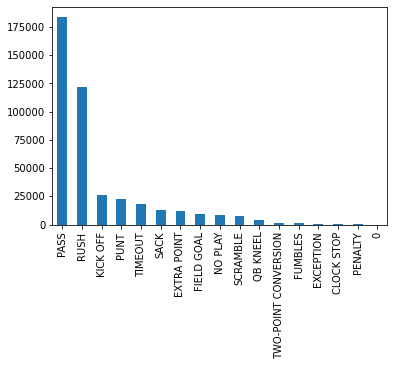

In [8]:
pbp_df['PlayType'].value_counts().plot(kind = 'bar')

In [33]:
# reduce down to relevant play types
pbp_df = pbp_df.loc[pbp_df['PlayType'].isin(['PASS','RUSH'])]

In [34]:
pbp_df['Formation'].unique()

array(['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE SHOTGUN', 'NO HUDDLE'],
      dtype=object)

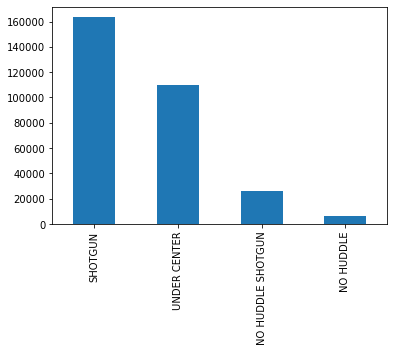

In [35]:
pbp_df['Formation'].value_counts().plot(kind = 'bar')

In [36]:
pbp_df = pbp_df.loc[pbp_df['Formation'].isin(['UNDER CENTER', 'NO HUDDLE', 'SHOTGUN', 'NO HUDDLE SHOTGUN'])]

In [37]:
pd.set_option('display.max_columns', 500)
pbp_df.describe()

,GameId,Quarter,Minute,Second,Down,ToGo,YardLine,SeriesFirstDown,NextScore,SeasonYear,Yards,IsRush,IsPass,IsIncomplete,IsTouchdown,IsSack,IsChallenge,IsChallengeReversed,IsMeasurement,IsInterception,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,IsPenaltyAccepted,IsNoPlay,PenaltyYards
count,3.056990e+05,305699.000000,305699.000000,305699.000000,305699.000000,305699.000000,305699.000000,305699.000000,305699.0,305699.000000,305699.000000,305699.000000,305699.000000,305699.000000,305699.000000,305699.0,305699.000000,305699.000000,305699.0,305699.000000,305699.000000,305699.0,305699.0,305699.000000,305699.000000,305699.000000,305699.000000
mean,2.017480e+09,2.554460,6.775335,28.568530,1.777991,8.573531,48.460309,0.286645,0.0,2017.352278,6.163707,0.399975,0.600025,0.214011,0.042454,0.0,0.006035,0.002509,0.0,0.014809,0.067727,0.0,0.0,28.767585,0.056425,0.043252,0.561314
std,2.846137e+06,1.129699,4.512713,17.746277,0.815478,3.955226,24.774603,0.452195,0.0,2.850958,8.964792,0.489894,0.489894,0.410135,0.201622,0.0,0.077453,0.050027,0.0,0.120787,0.251277,0.0,0.0,12.858255,0.230741,0.203424,2.739011
min,2.013090e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2013.000000,-26.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.015103e+09,2.000000,3.000000,13.000000,1.000000,6.000000,27.000000,0.000000,0.0,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,20.000000,0.000000,0.000000,0.000000
50%,2.017121e+09,3.000000,7.000000,28.000000,2.000000,10.000000,45.000000,0.000000,0.0,2017.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,29.000000,0.000000,0.000000,0.000000
75%,2.020102e+09,4.000000,11.000000,44.000000,2.000000,10.000000,68.000000,1.000000,0.0,2020.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,40.000000,0.000000,0.000000,0.000000
max,2.022122e+09,5.000000,15.000000,59.000000,4.000000,48.000000,100.000000,1.000000,0.0,2022.000000,104.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,50.000000,1.000000,1.000000,66.000000


In [38]:
pbp_df['Down'].value_counts()

1    138018
2    102512
3     60112
4      5038
0        19
Name: Down, dtype: int64

In [42]:
pbp_df = pbp_df.loc[pbp_df['Down'] != 0] # get rid of 0 Down Situations

In [45]:
pbp_df['GameTime'] = (pbp_df['Quarter'] - 1) *15 - pbp_df['Minute'] + 15 + (- pbp_df['Second'] + 60)*0.016

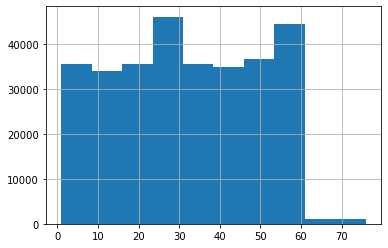

In [46]:
pbp_df['GameTime'].hist()

In [47]:
pbp_df= pbp_df.sort_values(by = ['GameId','GameTime'])
pbp_df.reset_index(drop=True, inplace = True)

In [53]:
pbp_df.loc[pbp_df['OffenseTeam'] == pbp_df['OffenseTeam'].shift(1), 'PreviousPlay'] = pbp_df['PlayType'].shift(1)

In [59]:
formation_encoder = LabelBinarizer()
formation_encoder.fit(pbp_df['Formation'])
transformed = formation_encoder.transform(pbp_df['Formation'])

ohe_df = pd.DataFrame(transformed, columns = formation_encoder.classes_)
pbp_df = pd.concat([pbp_df, ohe_df], axis=1)

In [63]:
# pbp_df.to_csv('./Data/Processed/pbp-processed.csv')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000
